In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
station_name = "胥湖心"
# 读取CSV文件
df = pd.read_csv(f'003-MCD18C2_061_20241123_插值填充_{station_name}.csv')

# 将日期列转换为datetime格式
df['date'] = pd.to_datetime(df['date'])

# 获取日期范围
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# 创建完整的日期DataFrame
complete_df = pd.DataFrame({'date': date_range})

# 与原始数据合并，保留所有日期
df_filled = pd.merge(complete_df, df, on='date', how='left')

# 将缺失值填充为NaN
df_filled = df_filled.fillna(np.nan)

# 读取站点数据
station_df = pd.read_csv(f'001-{station_name}.csv')
station_df['date'] = pd.to_datetime(station_df['date'])

# 将两个数据集按日期合并
merged_df = pd.merge(df_filled, station_df, on='date', how='left')

# 保存合并后的结果
merged_df.to_csv(f'004-MCD18C2-station-merged_{station_name}.csv', index=False)

print("已完成数据合并，包含遥感特征和站点数据")


已完成数据合并，包含遥感特征和站点数据



藻密度与其他变量的相关性分析:
density         1.000000
turbidity       0.539673
permanganate    0.464819
TN              0.412608
conductivity    0.412439
TP              0.298148
oxygen          0.281452
chla            0.156613
NH              0.104466
MPAR           -0.079380
PAI            -0.083303
GMT_2100_PAR   -0.086036
APAR           -0.086036
GMT_0600_PAR   -0.099741
GMT_0300_PAR   -0.114211
PDVI           -0.121167
PPDI           -0.121773
pH             -0.127019
DAPAR          -0.137068
GMT_0000_PAR   -0.168856
GMT_0900_PAR   -0.187251
temperature    -0.338759
Name: density, dtype: float64


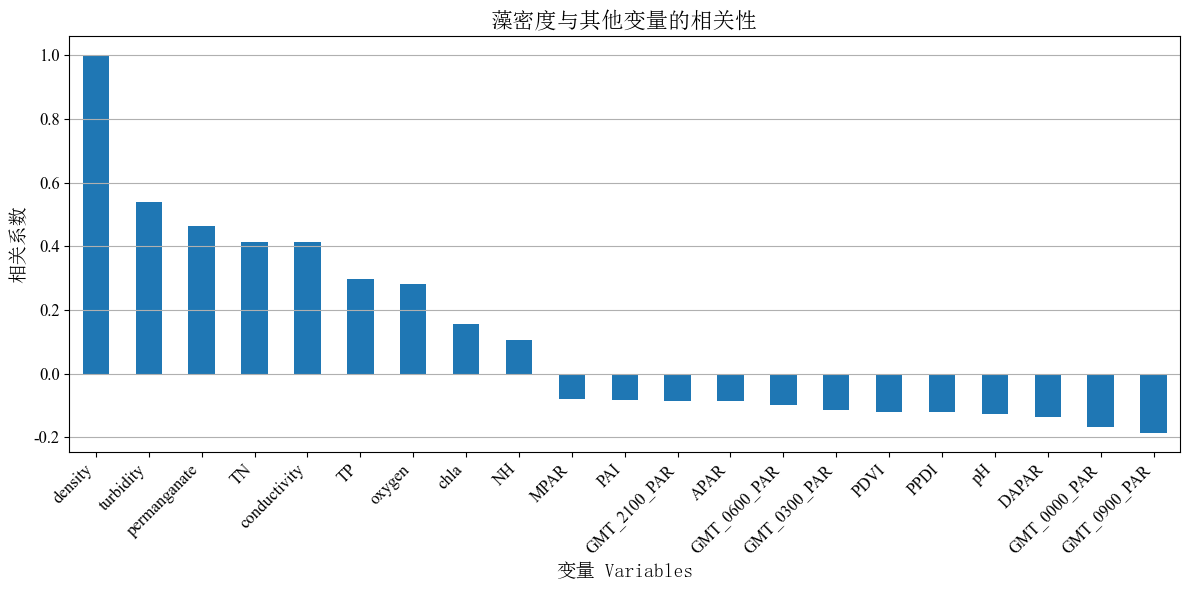


PAR变量与藻密度的相关性分析:
density         1.000000
GMT_2100_PAR   -0.086036
GMT_0600_PAR   -0.099741
GMT_0300_PAR   -0.114211
GMT_0000_PAR   -0.168856
GMT_0900_PAR   -0.187251
Name: density, dtype: float64

光合指数与藻密度的相关性分析:
density    1.000000
MPAR      -0.079380
PAI       -0.083303
APAR      -0.086036
PDVI      -0.121167
PPDI      -0.121773
DAPAR     -0.137068
Name: density, dtype: float64


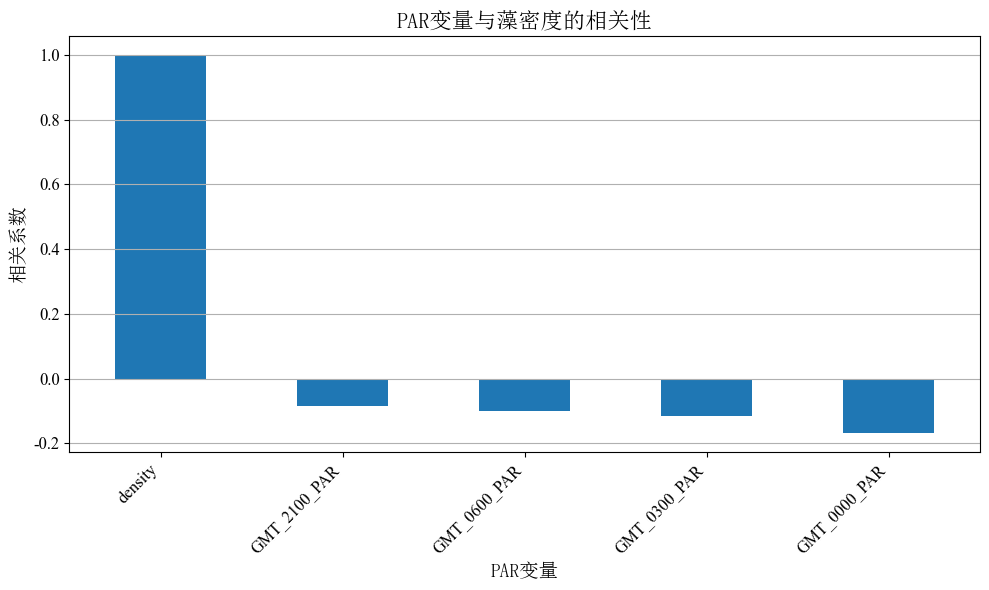

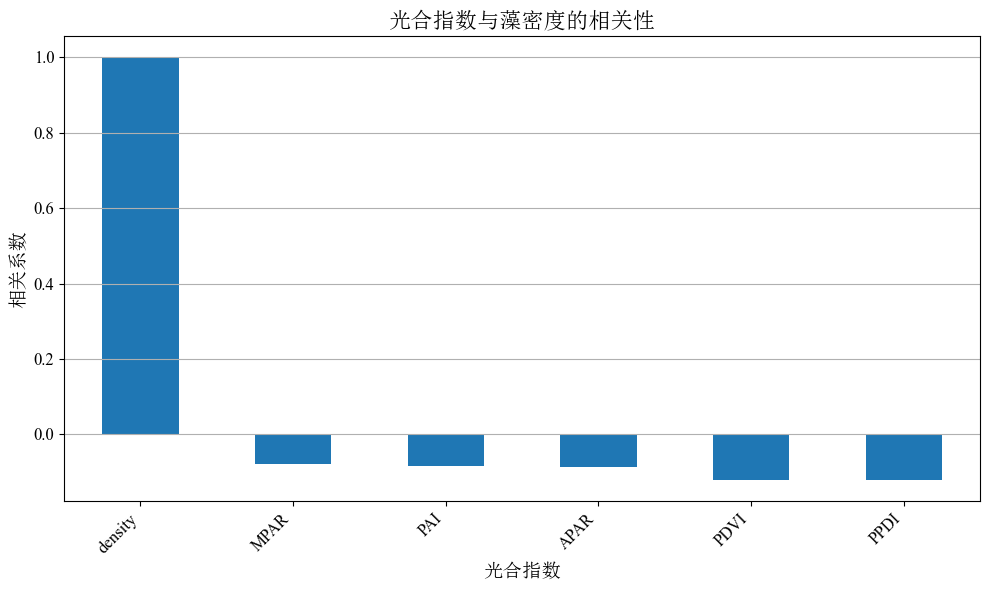

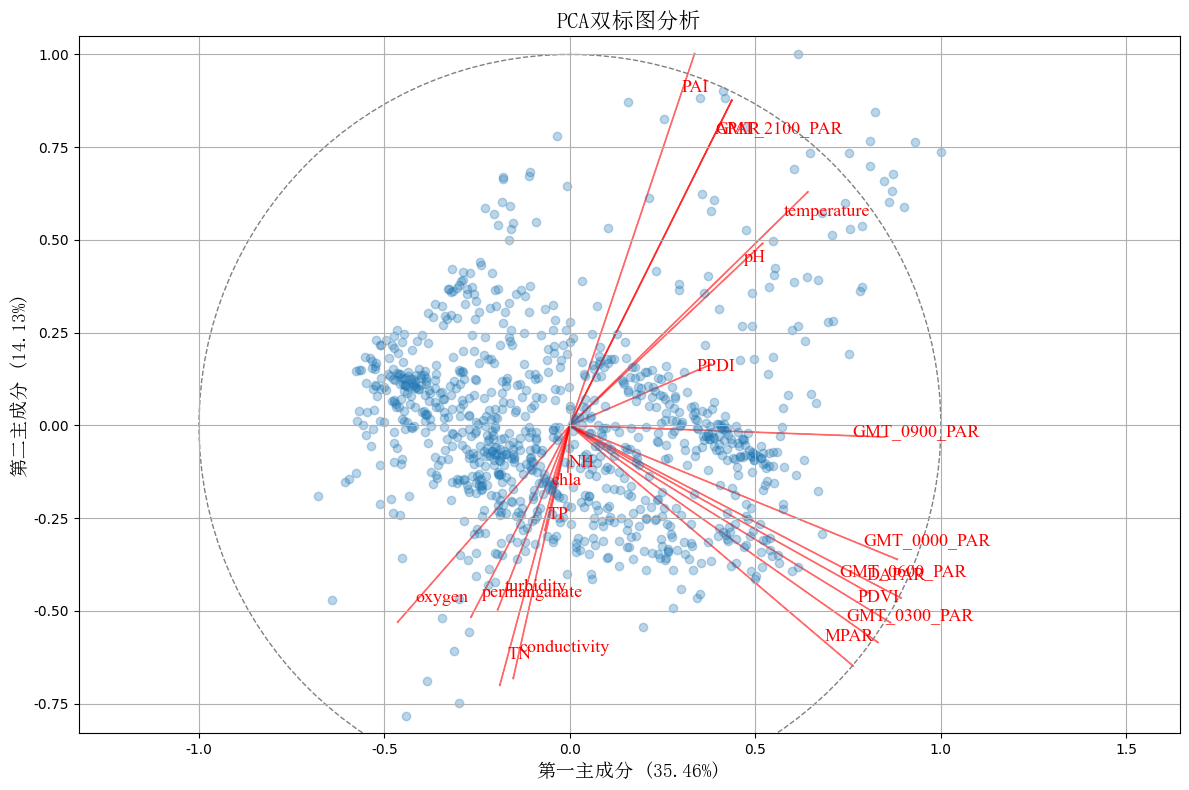

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 计算藻密度与其他变量的相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'chla', 'GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 
                   'GMT_0900_PAR', 'GMT_2100_PAR',
                   'DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']
correlations = merged_df[correlation_vars + ['density']].corr()['density'].sort_values(ascending=False)

# 打印相关性结果
print("\n藻密度与其他变量的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('藻密度与其他变量的相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=14)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=14)
plt.xticks(rotation=45, ha='right', fontproperties=english_font, fontsize=12)
plt.yticks(fontproperties=english_font, fontsize=12)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# 计算PAR相关变量与藻密度的相关性
par_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR',  'GMT_2100_PAR']
par_correlations = merged_df[par_vars + ['density']].corr()['density'].sort_values(ascending=False)

# 计算其他光合指数与藻密度的相关性
photo_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']
photo_correlations = merged_df[photo_vars + ['density']].corr()['density'].sort_values(ascending=False)

print("\nPAR变量与藻密度的相关性分析:")
print(par_correlations)

print("\n光合指数与藻密度的相关性分析:")
print(photo_correlations)

# 可视化PAR相关性
plt.figure(figsize=(10, 6))
par_correlations[:-1].plot(kind='bar')
plt.title('PAR变量与藻密度的相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('PAR变量', fontproperties=chinese_font, fontsize=14)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=14)
plt.xticks(rotation=45, ha='right', fontproperties=english_font, fontsize=12)
plt.yticks(fontproperties=english_font, fontsize=12)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 可视化光合指数相关性
plt.figure(figsize=(10, 6))
photo_correlations[:-1].plot(kind='bar')
plt.title('光合指数与藻密度的相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('光合指数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=14)
plt.xticks(rotation=45, ha='right', fontproperties=english_font, fontsize=12)
plt.yticks(fontproperties=english_font, fontsize=12)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 进行PCA分析
# 选择要进行PCA分析的变量
pca_vars = correlation_vars  # 使用之前定义的所有变量

# 准备数据
X = merged_df[pca_vars].dropna()
X_scaled = StandardScaler().fit_transform(X)

# 执行PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# 计算解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 绘制PCA双标图
plt.figure(figsize=(12, 8))
scale = np.max(np.abs(pca.components_[:2]))

# 绘制变量向量
for i, var in enumerate(pca_vars):
    plt.arrow(0, 0,
              pca.components_[0, i] / scale,
              pca.components_[1, i] / scale,
              color='r', alpha=0.5)
    # 调整文本位置,使用0.9而不是1.15,防止文本出界
    plt.text(pca.components_[0, i] / scale * 0.9,
             pca.components_[1, i] / scale * 0.9,
             var, color='r', fontproperties=english_font, fontsize=13)

# 绘制样本点
plt.scatter(pca_result[:, 0] / np.max(np.abs(pca_result[:, 0])),
            pca_result[:, 1] / np.max(np.abs(pca_result[:, 1])),
            alpha=0.3)

# 添加标题和轴标签
plt.title('PCA双标图分析', fontproperties=chinese_font, fontsize=16)
plt.xlabel(f'第一主成分 ({explained_variance_ratio[0]:.2%})', fontproperties=chinese_font, fontsize=14)
plt.ylabel(f'第二主成分 ({explained_variance_ratio[1]:.2%})', fontproperties=chinese_font, fontsize=14)

# 添加单位圆
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
plt.gca().add_artist(circle)
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


叶绿素与其他变量的相关性分析:
chla            1.000000
density         0.156613
conductivity    0.121122
TN              0.108558
oxygen          0.069425
permanganate    0.057327
TP              0.054692
turbidity       0.049508
NH              0.011103
pH              0.005649
MPAR            0.003091
GMT_0300_PAR   -0.011309
PPDI           -0.011964
PDVI           -0.017907
GMT_0000_PAR   -0.021480
DAPAR          -0.036516
GMT_2100_PAR   -0.041660
APAR           -0.041660
PAI            -0.046914
GMT_0600_PAR   -0.055656
GMT_0900_PAR   -0.066580
temperature    -0.079568
Name: chla, dtype: float64


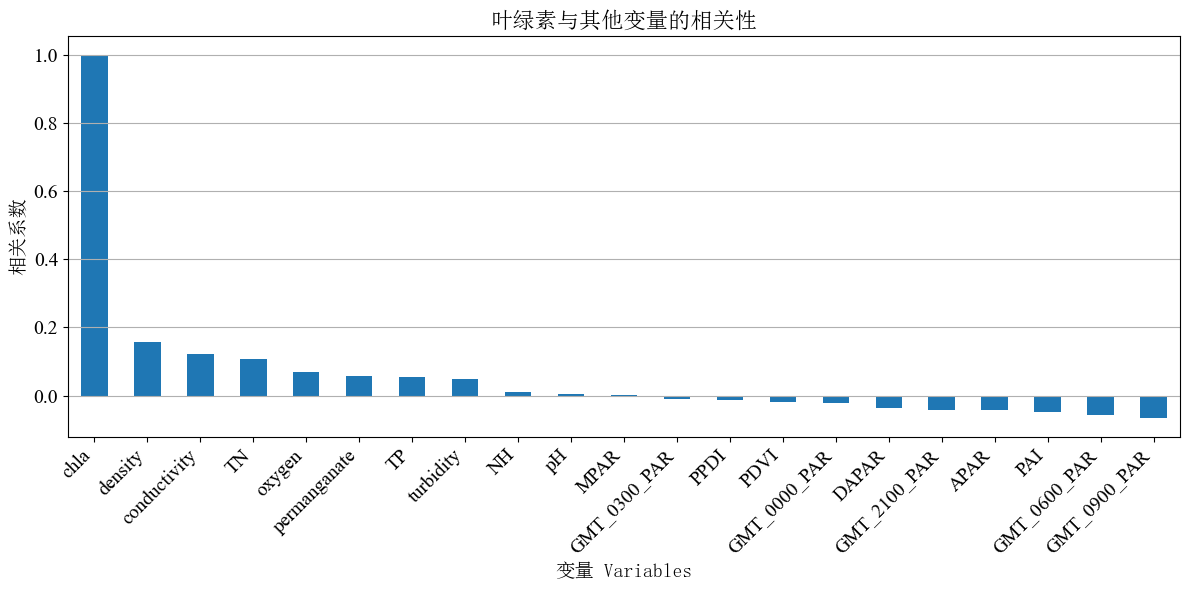


PAR相关变量与叶绿素的相关性分析:
chla            1.000000
GMT_0300_PAR   -0.011309
GMT_0000_PAR   -0.021480
GMT_2100_PAR   -0.041660
GMT_0600_PAR   -0.055656
GMT_0900_PAR   -0.066580
Name: chla, dtype: float64

光合指数与叶绿素的相关性分析:
chla     1.000000
MPAR     0.003091
PPDI    -0.011964
PDVI    -0.017907
DAPAR   -0.036516
APAR    -0.041660
PAI     -0.046914
Name: chla, dtype: float64


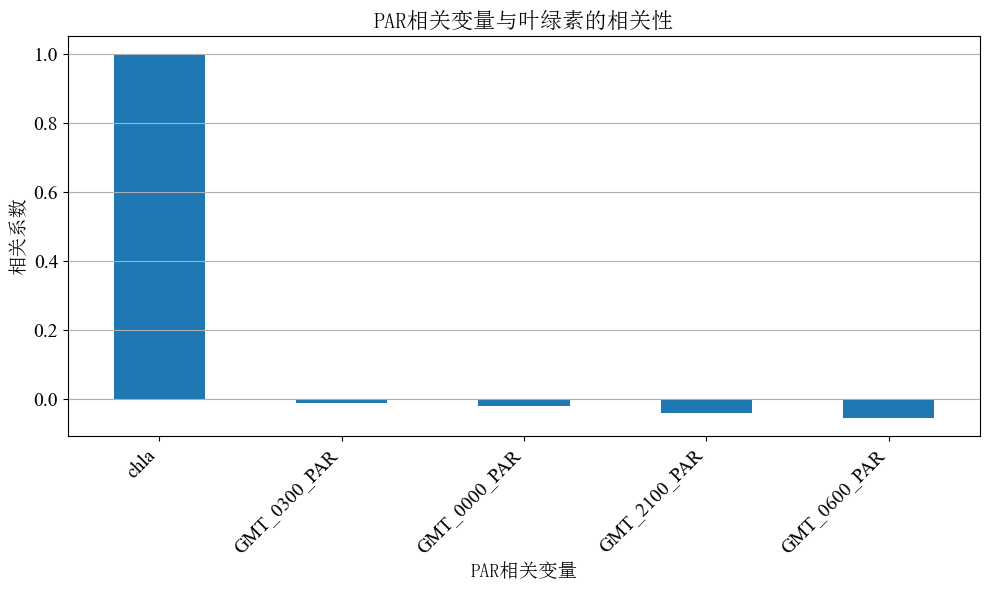

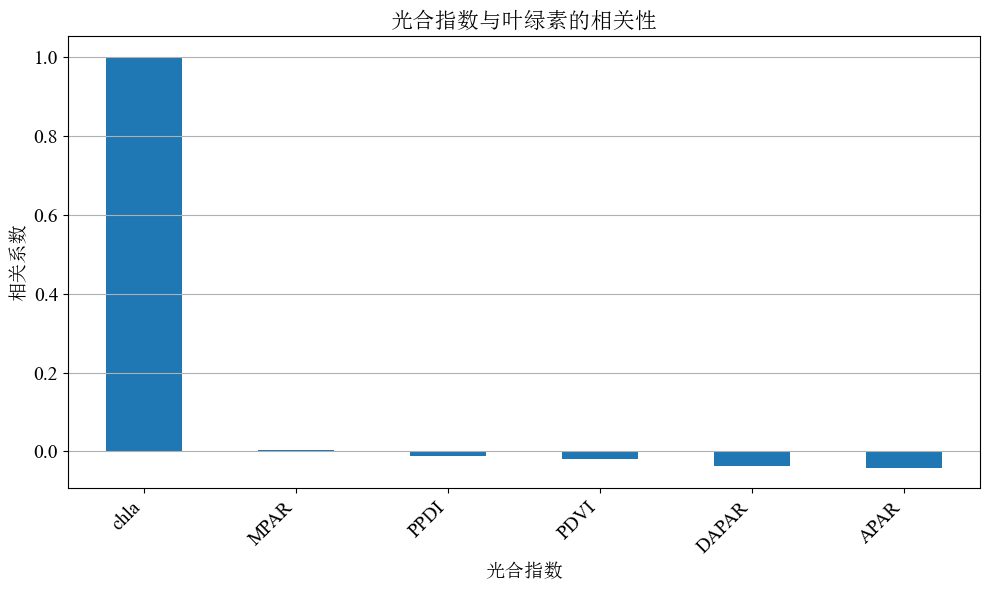

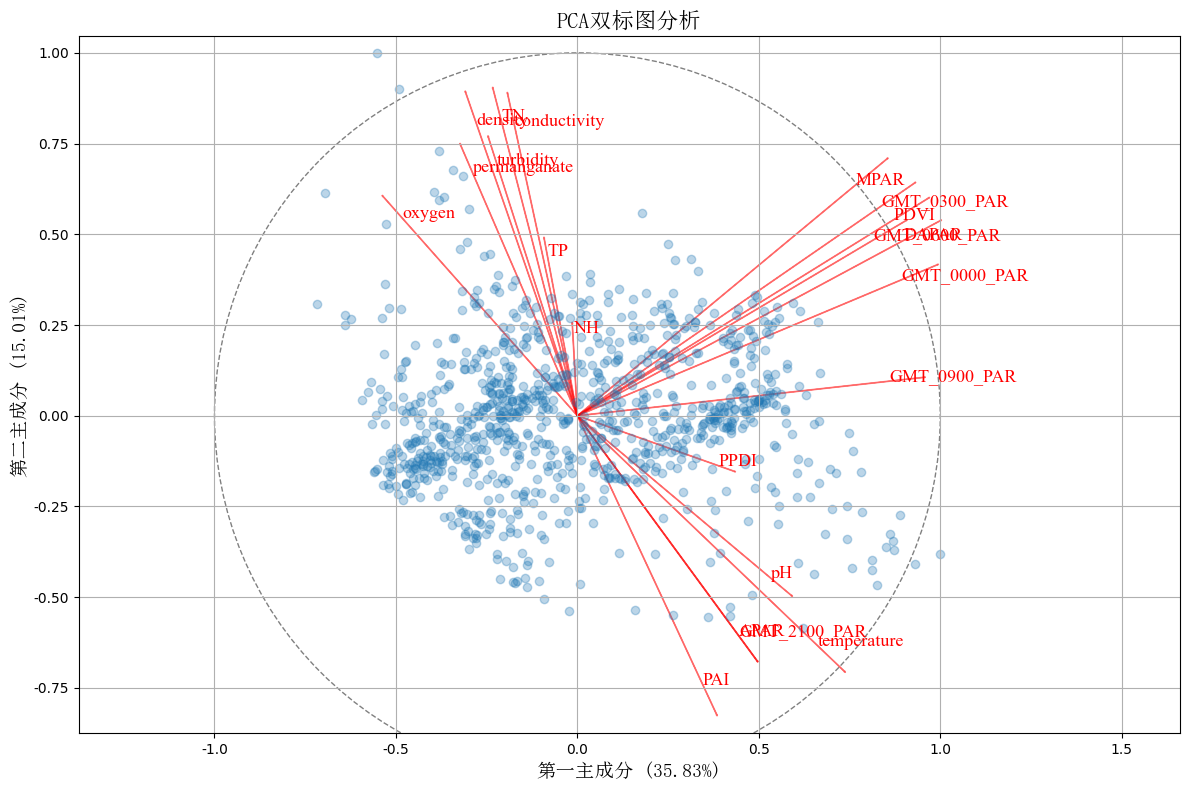

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 读取数据
# merged_df = pd.read_csv('/root/Download/Modis-algae-aliyun/aie-taihu/特征和密度结果_MODIS_MCD18C2_061_20241027_插值填充-lanshanzui-merged.csv')

# 计算叶绿素与其他变量的相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'density', 'GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 
                   'GMT_0900_PAR', 'GMT_2100_PAR',
                   'DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']
correlations = merged_df[correlation_vars + ['chla']].corr()['chla'].sort_values(ascending=False)

# 打印相关性结果
print("\n叶绿素与其他变量的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('叶绿素与其他变量的相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=14)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='both', which='major', labelsize=12)
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# 计算PAR相关变量与叶绿素的相关性
par_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR', 'GMT_2100_PAR']
par_correlations = merged_df[par_vars + ['chla']].corr()['chla'].sort_values(ascending=False)

# 计算其他光合指数与叶绿素的相关性
photo_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']
photo_correlations = merged_df[photo_vars + ['chla']].corr()['chla'].sort_values(ascending=False)

print("\nPAR相关变量与叶绿素的相关性分析:")
print(par_correlations)

print("\n光合指数与叶绿素的相关性分析:")
print(photo_correlations)

# 可视化PAR相关变量相关性
plt.figure(figsize=(10, 6))
par_correlations[:-1].plot(kind='bar')
plt.title('PAR相关变量与叶绿素的相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('PAR相关变量', fontproperties=chinese_font, fontsize=14)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='both', which='major', labelsize=12)
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 可视化光合指数相关性
plt.figure(figsize=(10, 6))
photo_correlations[:-1].plot(kind='bar')
plt.title('光合指数与叶绿素的相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('光合指数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='both', which='major', labelsize=12)
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 进行PCA分析
# 选择要进行PCA分析的变量
pca_vars = correlation_vars  # 使用之前定义的所有变量

# 准备数据
X = merged_df[pca_vars].dropna()
X_scaled = StandardScaler().fit_transform(X)

# 执行PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# 计算解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 绘制PCA双标图
plt.figure(figsize=(12, 8))
scale = np.max(np.abs(pca.components_[:2]))

# 绘制变量向量
for i, var in enumerate(pca_vars):
    plt.arrow(0, 0,
              pca.components_[0, i] / scale,
              pca.components_[1, i] / scale,
              color='r', alpha=0.5)
    # 调整文本位置,使用0.9而不是1.15,防止文本出界
    plt.text(pca.components_[0, i] / scale * 0.9,
             pca.components_[1, i] / scale * 0.9,
             var, color='r', fontproperties=english_font, fontsize=13)

# 绘制样本点
plt.scatter(pca_result[:, 0] / np.max(np.abs(pca_result[:, 0])),
            pca_result[:, 1] / np.max(np.abs(pca_result[:, 1])),
            alpha=0.3)

# 添加标题和轴标签
plt.title('PCA双标图分析', fontproperties=chinese_font, fontsize=16)
plt.xlabel(f'第一主成分 ({explained_variance_ratio[0]:.2%})', fontproperties=chinese_font, fontsize=14)
plt.ylabel(f'第二主成分 ({explained_variance_ratio[1]:.2%})', fontproperties=chinese_font, fontsize=14)

# 添加单位圆
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
plt.gca().add_artist(circle)
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.

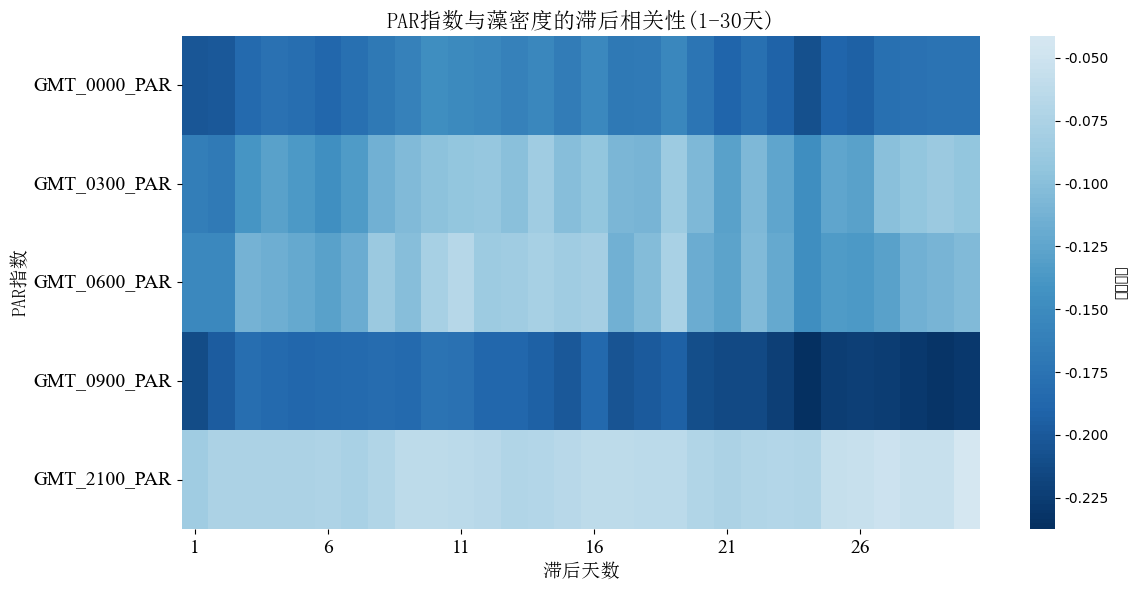

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.

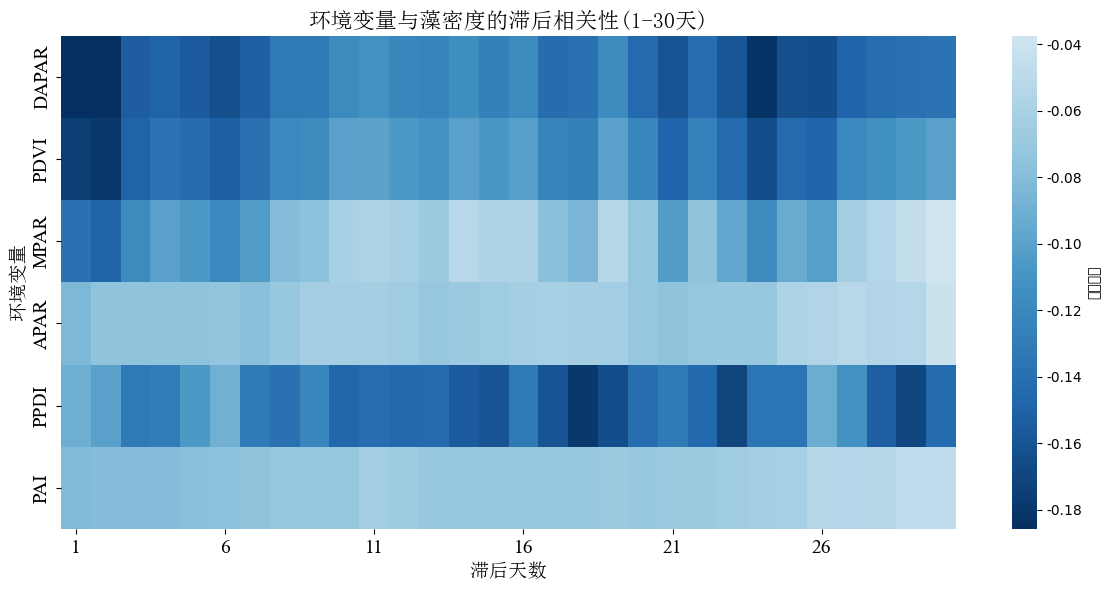


PAR指数的最大滞后相关性及对应滞后天数:
GMT_0000_PAR: 相关系数 = -0.208, 滞后天数 = 24
GMT_0300_PAR: 相关系数 = -0.167, 滞后天数 = 2
GMT_0600_PAR: 相关系数 = -0.153, 滞后天数 = 1
GMT_0900_PAR: 相关系数 = -0.237, 滞后天数 = 24
GMT_2100_PAR: 相关系数 = -0.084, 滞后天数 = 1

环境变量的最大滞后相关性及对应滞后天数:
DAPAR: 相关系数 = -0.186, 滞后天数 = 1
PDVI: 相关系数 = -0.180, 滞后天数 = 2
MPAR: 相关系数 = -0.149, 滞后天数 = 2
APAR: 相关系数 = -0.084, 滞后天数 = 1
PPDI: 相关系数 = -0.179, 滞后天数 = 18
PAI: 相关系数 = -0.082, 滞后天数 = 1


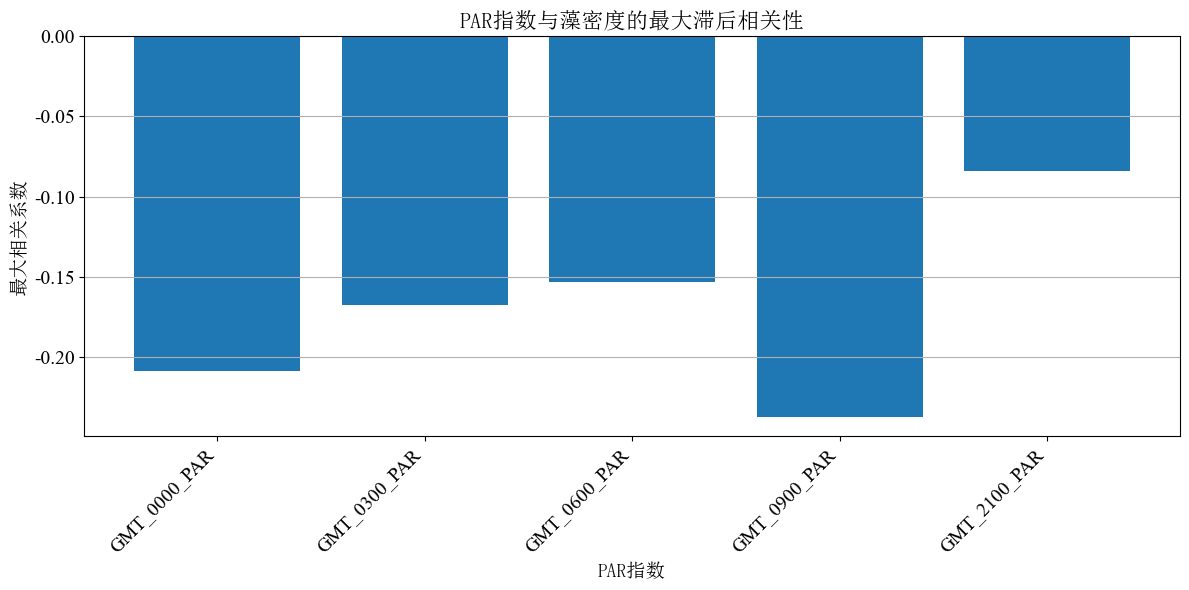

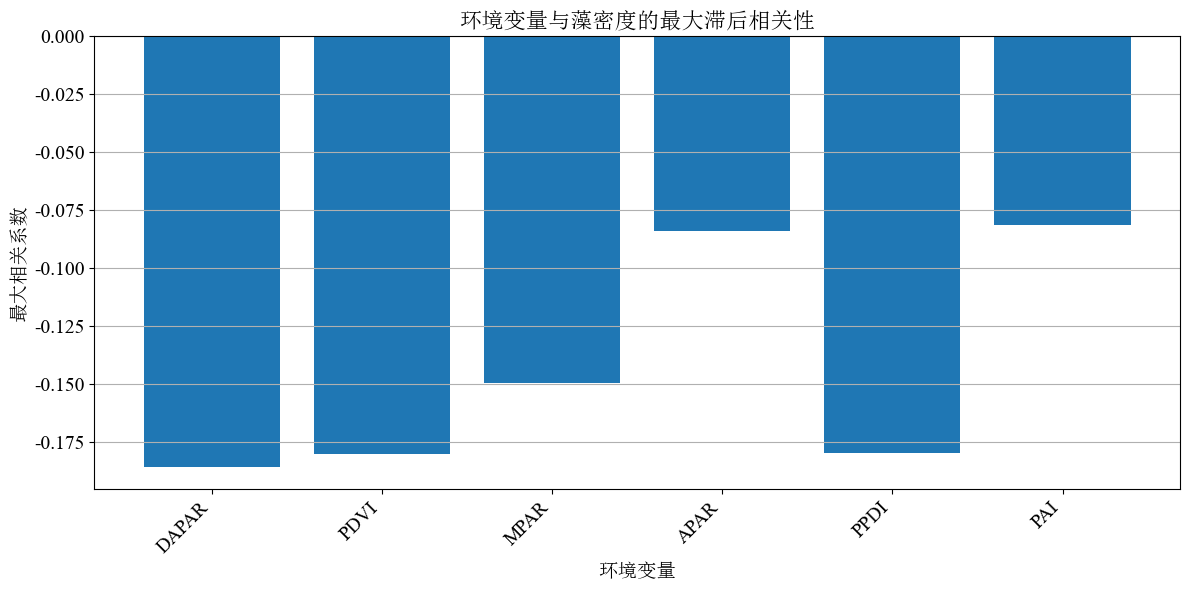

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 读取数据
# merged_df = pd.read_csv('/root/Download/Modis-algae-aliyun/aie-taihu/特征和密度结果_MODIS_MCD18C2_061_20241027_插值填充-lanshanzui-merged.csv')

# 定义遥感指数和波段变量
rs_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR',  'GMT_2100_PAR']
env_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']

# 计算滞后相关性
max_lag = 30  # 最大滞后天数

# 遥感指数的滞后相关性分析
rs_lag_correlations = {}
for var in rs_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        lagged_corr = merged_df[var].shift(lag).corr(merged_df['density'])  # 改为density
        lag_corrs.append(lagged_corr)
    rs_lag_correlations[var] = lag_corrs

# 环境变量的滞后相关性分析
env_lag_correlations = {}
for var in env_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        lagged_corr = merged_df[var].shift(lag).corr(merged_df['density'])  # 改为density
        lag_corrs.append(lagged_corr)
    env_lag_correlations[var] = lag_corrs

# 绘制遥感指数滞后相关性热力图
plt.figure(figsize=(12, 6))
rs_lag_data = pd.DataFrame(rs_lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(rs_lag_data.T, cmap='RdBu_r', center=0,
            xticklabels=5,
            cbar_kws={'label': '相关系数'})
plt.title('PAR指数与藻密度的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=16)  # 改为藻密度
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('PAR指数', fontproperties=chinese_font, fontsize=14)
# 设置刻度字体
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)
plt.tight_layout()
plt.show()

# 绘制环境变量滞后相关性热力图
plt.figure(figsize=(12, 6))
env_lag_data = pd.DataFrame(env_lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(env_lag_data.T, cmap='RdBu_r', center=0,
            xticklabels=5,
            cbar_kws={'label': '相关系数'})
plt.title('环境变量与藻密度的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=16)  # 改为藻密度
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('环境变量', fontproperties=chinese_font, fontsize=14)
# 设置刻度字体
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)
plt.tight_layout()
plt.show()

# 找出遥感指数的最大滞后相关性
rs_max_lag_correlations = {}
for var in rs_vars:
    max_corr = max(rs_lag_correlations[var], key=abs)
    max_lag = rs_lag_correlations[var].index(max_corr) + 1
    rs_max_lag_correlations[var] = (max_corr, max_lag)

# 找出环境变量的最大滞后相关性
env_max_lag_correlations = {}
for var in env_vars:
    max_corr = max(env_lag_correlations[var], key=abs)
    max_lag = env_lag_correlations[var].index(max_corr) + 1
    env_max_lag_correlations[var] = (max_corr, max_lag)

print("\nPAR指数的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in rs_max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

print("\n环境变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in env_max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制遥感指数最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
rs_max_corrs = [corr for corr, _ in rs_max_lag_correlations.values()]
plt.bar(rs_max_lag_correlations.keys(), rs_max_corrs)
plt.title('PAR指数与藻密度的最大滞后相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('PAR指数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=14)
# 设置刻度字体
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制环境变量最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
env_max_corrs = [corr for corr, _ in env_max_lag_correlations.values()]
plt.bar(env_max_lag_correlations.keys(), env_max_corrs)
plt.title('环境变量与藻密度的最大滞后相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('环境变量', fontproperties=chinese_font, fontsize=14)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=14)
# 设置刻度字体
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.

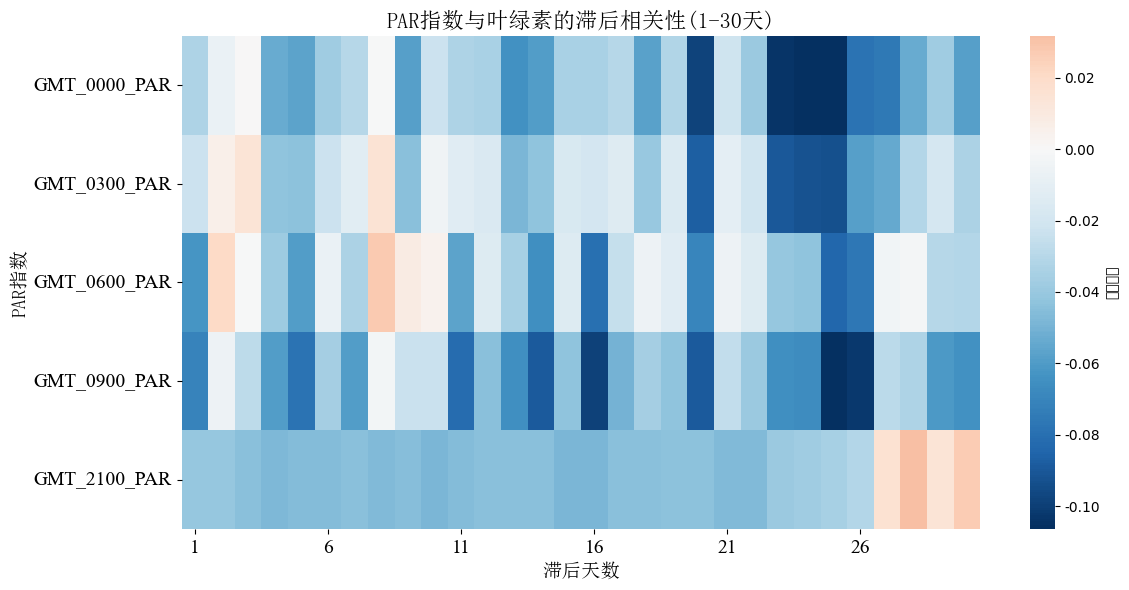

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.

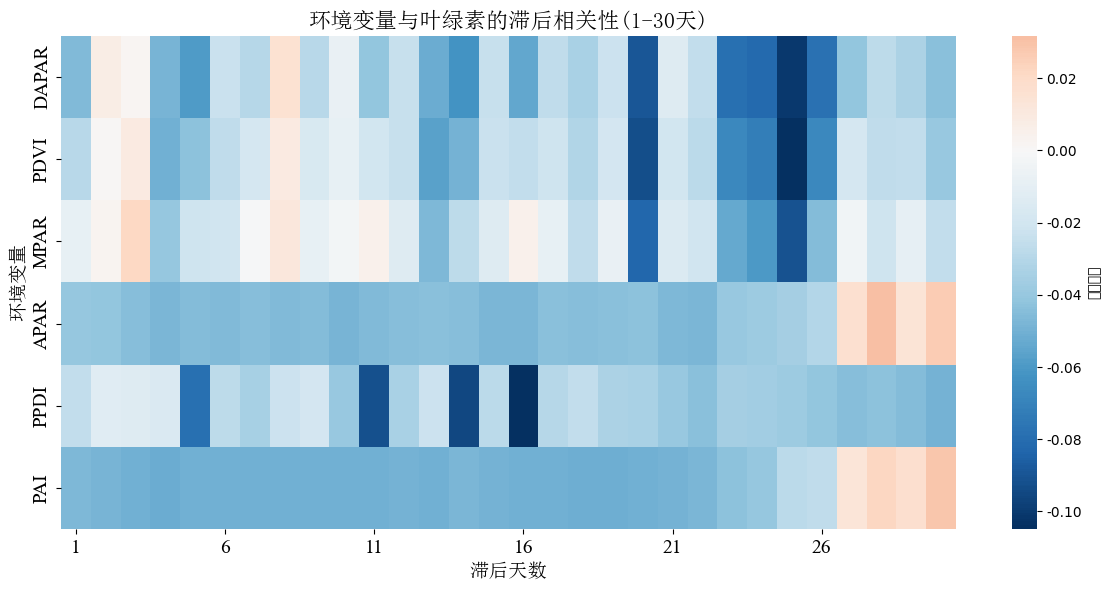


PAR指数的最大滞后相关性及对应滞后天数:
GMT_0000_PAR: 相关系数 = -0.106, 滞后天数 = 24
GMT_0300_PAR: 相关系数 = -0.093, 滞后天数 = 25
GMT_0600_PAR: 相关系数 = -0.084, 滞后天数 = 25
GMT_0900_PAR: 相关系数 = -0.106, 滞后天数 = 25
GMT_2100_PAR: 相关系数 = -0.049, 滞后天数 = 10

环境变量的最大滞后相关性及对应滞后天数:
DAPAR: 相关系数 = -0.101, 滞后天数 = 25
PDVI: 相关系数 = -0.104, 滞后天数 = 25
MPAR: 相关系数 = -0.091, 滞后天数 = 25
APAR: 相关系数 = -0.049, 滞后天数 = 10
PPDI: 相关系数 = -0.105, 滞后天数 = 16
PAI: 相关系数 = -0.052, 滞后天数 = 4


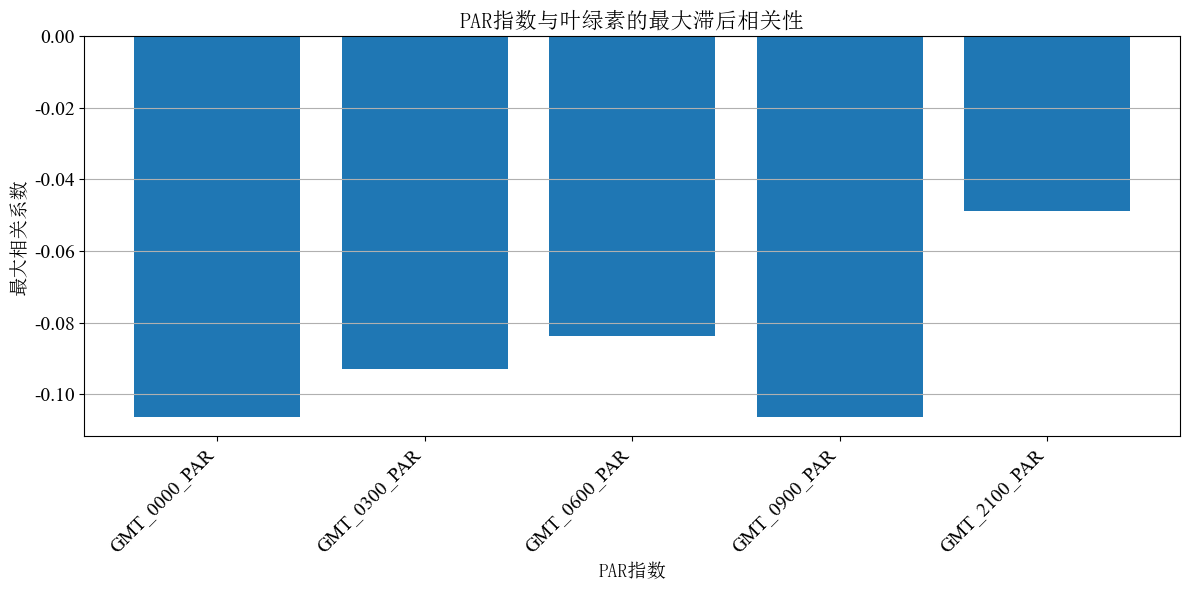

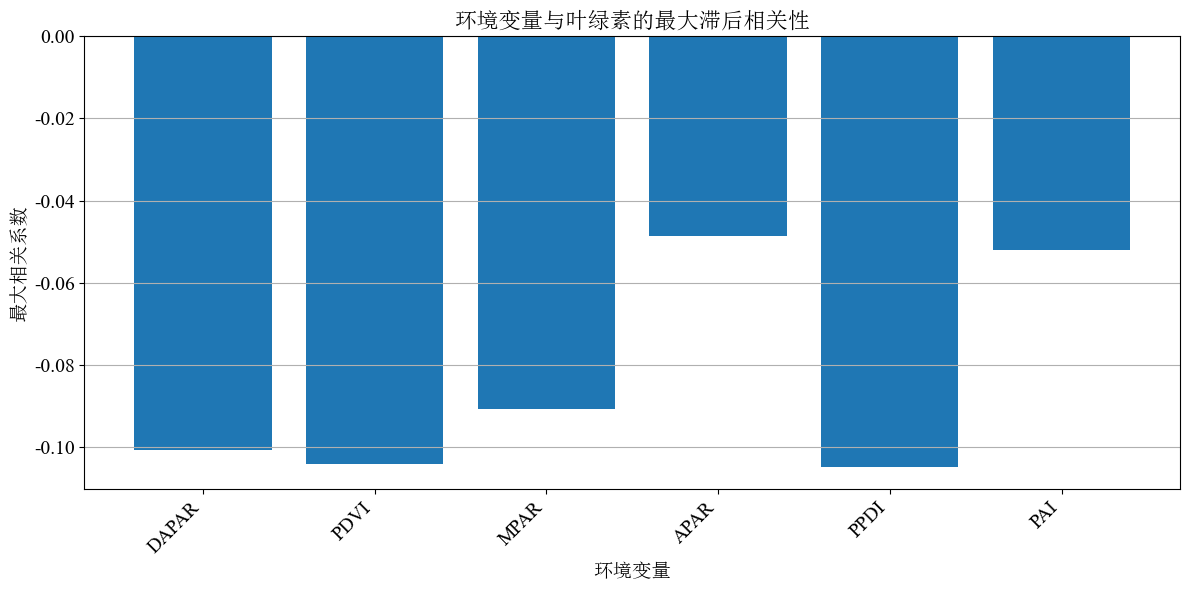

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 读取数据
# merged_df = pd.read_csv('/root/Download/Modis-algae-aliyun/aie-taihu/特征和密度结果_MODIS_MCD18C2_061_20241027_插值填充-lanshanzui-merged.csv')

# 定义遥感指数和波段变量
rs_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR',  'GMT_2100_PAR']
env_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']

# 计算滞后相关性
max_lag = 30  # 最大滞后天数

# 遥感指数的滞后相关性分析
rs_lag_correlations = {}
for var in rs_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        lagged_corr = merged_df[var].shift(lag).corr(merged_df['chla'])
        lag_corrs.append(lagged_corr)
    rs_lag_correlations[var] = lag_corrs

# 环境变量的滞后相关性分析
env_lag_correlations = {}
for var in env_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        lagged_corr = merged_df[var].shift(lag).corr(merged_df['chla'])
        lag_corrs.append(lagged_corr)
    env_lag_correlations[var] = lag_corrs

# 绘制遥感指数滞后相关性热力图
plt.figure(figsize=(12, 6))
rs_lag_data = pd.DataFrame(rs_lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(rs_lag_data.T, cmap='RdBu_r', center=0,
            xticklabels=5,
            cbar_kws={'label': '相关系数'})
plt.title('PAR指数与叶绿素的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=16)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('PAR指数', fontproperties=chinese_font, fontsize=14)
# 设置刻度字体
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)
plt.tight_layout()
plt.show()

# 绘制环境变量滞后相关性热力图
plt.figure(figsize=(12, 6))
env_lag_data = pd.DataFrame(env_lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(env_lag_data.T, cmap='RdBu_r', center=0,
            xticklabels=5,
            cbar_kws={'label': '相关系数'})
plt.title('环境变量与叶绿素的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=16)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('环境变量', fontproperties=chinese_font, fontsize=14)
# 设置刻度字体
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)
plt.tight_layout()
plt.show()

# 找出遥感指数的最大滞后相关性
rs_max_lag_correlations = {}
for var in rs_vars:
    max_corr = max(rs_lag_correlations[var], key=abs)
    max_lag = rs_lag_correlations[var].index(max_corr) + 1
    rs_max_lag_correlations[var] = (max_corr, max_lag)

# 找出环境变量的最大滞后相关性
env_max_lag_correlations = {}
for var in env_vars:
    max_corr = max(env_lag_correlations[var], key=abs)
    max_lag = env_lag_correlations[var].index(max_corr) + 1
    env_max_lag_correlations[var] = (max_corr, max_lag)

print("\nPAR指数的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in rs_max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

print("\n环境变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in env_max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制遥感指数最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
rs_max_corrs = [corr for corr, _ in rs_max_lag_correlations.values()]
plt.bar(rs_max_lag_correlations.keys(), rs_max_corrs)
plt.title('PAR指数与叶绿素的最大滞后相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('PAR指数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=14)
# 设置刻度字体
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制环境变量最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
env_max_corrs = [corr for corr, _ in env_max_lag_correlations.values()]
plt.bar(env_max_lag_correlations.keys(), env_max_corrs)
plt.title('环境变量与叶绿素的最大滞后相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('环境变量', fontproperties=chinese_font, fontsize=14)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=14)
# 设置刻度字体
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(english_font)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()